# Exploring the output of the GSDR algorithm

## What is the GSDR Algorithm?

 ***25 quality checks and 11 rules used to exclude suspicious values.***

Follows WMO test classes including format, completeness, consistency (internal, temporal, spatial, summarisation), tolerance/range, spike and streak. 

Was applied to 24,394 rain gauge data sets from around the world with hourly or shorter interval records. Data aggregated to hourly for this study. Rule base removes individual hours from the record, rather than gauges. 

The user provides hourly and daily maxima appriate for the dataset, determine the period of overlap for nearest neighbour comparisons and provide climate indices defined by the Expert Team on Climate Change Detection and Indices (ETCCDI) and the Global Precipitation Climatology Centre (GPCC) daily and monthly precipitation databases can be used. The gauge data have to be transformed into the correct format to run the algorithm. 

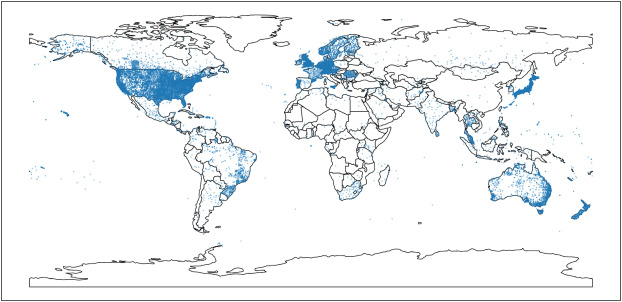

**Rain gauge locations**

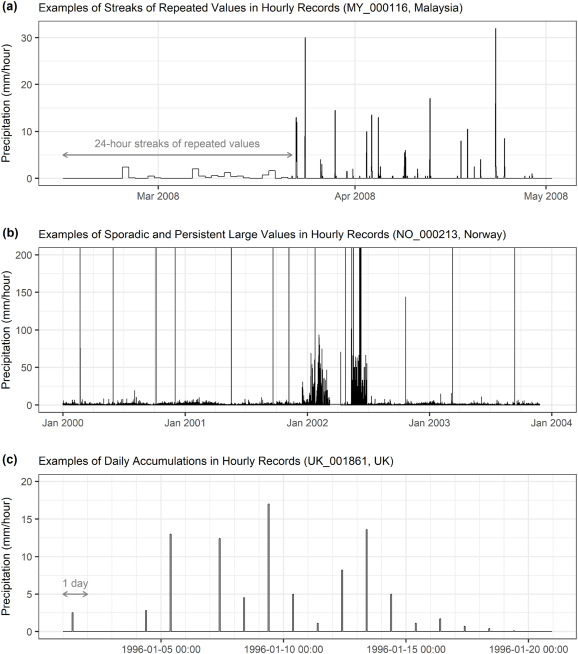

**Examples of errors in rain gauge data**

Outputs of the GSDR algorithm:
- Flag file for each gauge with individual hours flagged as suspicious according to quality control measures
- Data file for each gauge with data breaching rules removed
- Summary file with an overview of each gauge record (including metadata) and impact of QC

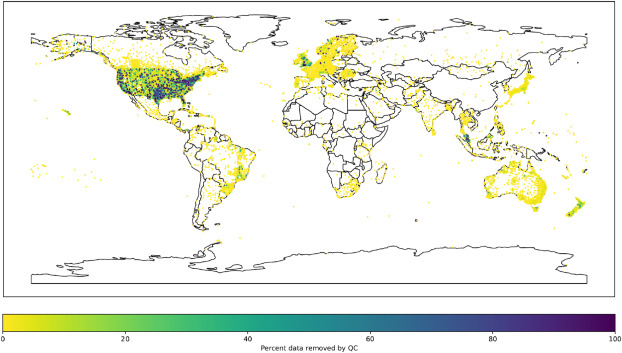

**Impact of GSDR algoritm**

The algorithm can be used at shorter temporal durations, see Villalobos‐Herrera et al. (2022). The potential for gap gilling in the official sub-hourly monitoring network in Britain was exmplord by O'Hara et al. (2023), showing where rain gauges reporting the the Met Office WOW system are located. These were subject to the same GSDR algorithm.

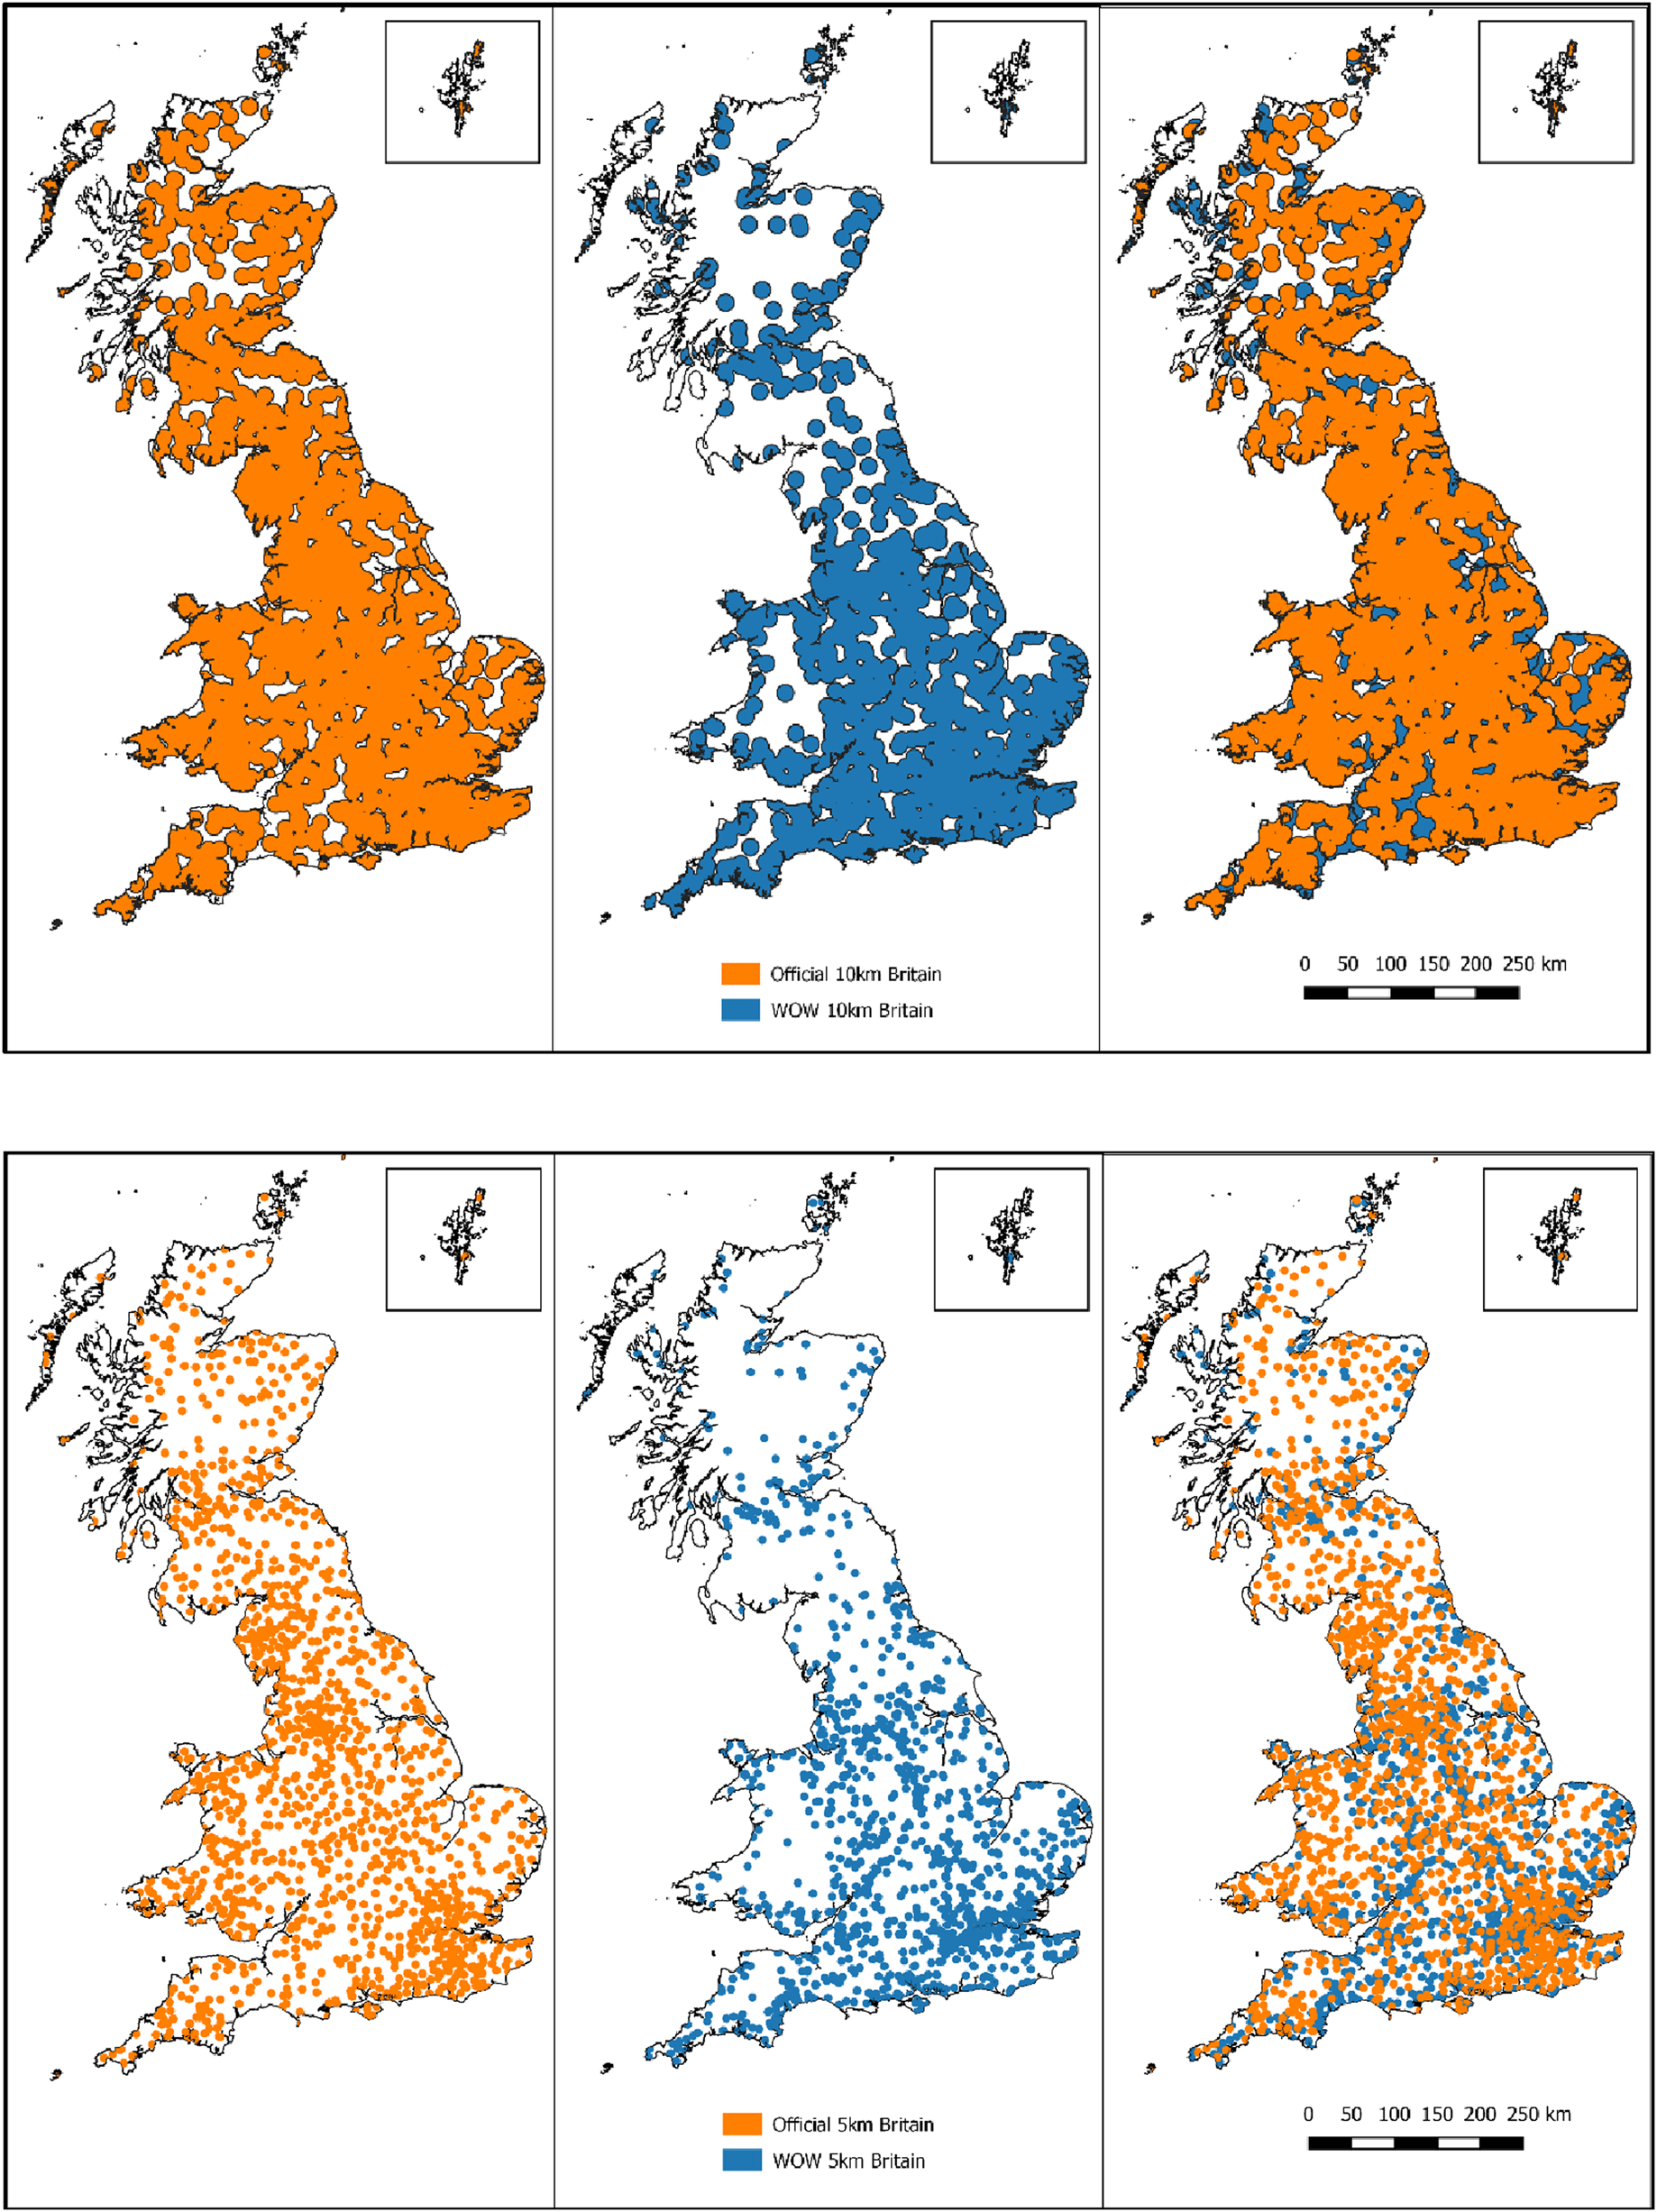

Th GSDR algorithm was compared with the PWSQC and PWS-pyQC algorithms for a test dataset from Amsterdam. The reserach highlighted that each method has different strengths and weaknesses depending on the data density, rain gauge types and storm profiles. Further benchamarking of the algorithms is planned, and here we will explore the outputs from the GSDR algorithm. 

**Relevant Papers**

Lewis, E., Pritchard, D., Villalobos-Herrera, R., Blenkinsop, S., McClean, F., Guerreiro, S., Schneider, U., Becker, A., Finger, P., Meyer-Christoffer, A. and Rustemeier, E., 2021. Quality control of a global hourly rainfall dataset. Environmental Modelling & Software, 144, p.105169. https://doi.org/10.1016/j.envsoft.2021.105169

Villalobos‐Herrera, R., Blenkinsop, S., Guerreiro, S.B., O'Hara, T. and Fowler, H.J., 2022. Sub‐hourly resolution quality control of rain‐gauge data significantly improves regional sub‐daily return level estimates. Quarterly Journal of the Royal Meteorological Society, 148(748), pp.3252-3271. https://doi.org/10.1002/qj.4357

El Hachem, A., Seidel, J., O'Hara, T., Villalobos Herrera, R., Overeem, A., Uijlenhoet, R., Bárdossy, A. and de Vos, L., 2023. Overview and comparison of three quality control algorithms for rainfall data from personal weather stations. Hydrology and Earth System Sciences Discussions, 2023, pp.1-22. https://hess.copernicus.org/preprints/hess-2023-195/

O'Hara, T., McClean, F., Villalobos Herrera, R., Lewis, E. and Fowler, H.J., 2023. Filling observational gaps with crowdsourced citizen science rainfall data from the Met Office Weather Observation Website. Hydrology Research, 54(4), pp.547-556. https://doi.org/10.2166/nh.2023.136

## 1. Setting up the python packages and importing data

This exercise uses output files from the GSDR-QC to explore the data both pre- and post-QC. For ease we have run the algorithm and combined the output files into a single .csv file. 

### 1.1 Import packages

In [ ]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline
pd.options.display.max_columns = None

### 1.2 Import data

In [ ]:
# Relative path to the data directory
main_dir = r".././data/pws/"

# Set paths to data
raw_path = os.path.join(main_dir, r"gsdr_input_rainfall.csv")
qc_path = os.path.join(main_dir, r"gsdr_output_rainfall.csv")
sum_path = os.path.join(main_dir, r"gsdr_output_qc_summary.csv")



# Import observations
# Set 'Time' column as datetime index for analysis later
raw_df = pd.read_csv(raw_path, sep=",", parse_dates=['Time'], dayfirst=True, index_col='Time')
# Drop the first row
raw_df = raw_df.iloc[1:]

#raw_df = pd.read_csv(raw_path, sep=";", parse_dates=['Time'], index_col='Time')
qc_df = pd.read_csv(qc_path, parse_dates=['Time'], index_col=['Time'])

# Import summary table and look at top three lines
sum_df = pd.read_csv(sum_path)
sum_df.drop('Folder', axis=1, inplace=True)
sum_df.head(3)

In [ ]:
# Testing the datetime index
if isinstance(raw_df.index, pd.DatetimeIndex):
    print("The raw data DataFrame has a datetime index. Hurray!")
else:
    print("The raw data DataFrame does not have a datetime index. Boo!")


if isinstance(qc_df.index, pd.DatetimeIndex):
    print("The qc data DataFrame has a datetime index. Hurray!")
else:
    print("The qc data DataFrame does not have a datetime index. Boo!")

# Just becasue this is the most common error I have and it drives me insane every time!

In [ ]:
# You can look at the raw data as a reminder by uncommenting the next line if you wish
# raw_df

The qc_df dataframe includes a lot of columns! These describe the performance of each gauge record against the QC flags. We will look at some of these further. 

In [ ]:
# Take a look at all the columns in the QC summary dataframe...
sum_df.columns

## 2. Analyse data pre-QC

### 2.1 Plotting gauge locations

In [ ]:
# Create the plot and set marker and grid styles
fig, ax = plt.subplots()
ax.scatter(sum_df.Longitude, sum_df.Latitude, s=15, edgecolors='black')
ax.grid()
ax.set_aspect('equal')
ax.grid(linestyle = "dashed")

# Calculate the rounded tick locations for both x and y axes to make a neat plot
x_min_rounded = 0.1 * np.floor(min(sum_df.Longitude) / 0.1)
x_max_rounded = 0.1 * np.ceil(max(sum_df.Longitude) / 0.1)
y_min_rounded = 0.1 * np.floor(min(sum_df.Latitude) / 0.1)
y_max_rounded = 0.1 * np.ceil(max(sum_df.Latitude) / 0.1)

# Set tick marks for x and y
ax.set_xticks(np.arange(x_min_rounded, x_max_rounded + 0.1, 0.1))
ax.set_yticks(np.arange(y_min_rounded, y_max_rounded + 0.1, 0.1))

# Add a title
plt.title('PWS gauge locations in and around Amsterdam')

# Show the plot
plt.show()

The scatter plot show the locations of guages in the Amsterdam area. For clarity a basemap could be added to the plot. See https://matplotlib.org/basemap/users/examples.html for some options

### 2.2 Gauges with missing data before QC

In [ ]:
# select values from column in dataframe
values = sum_df['PC_missing_original']

# Define the boundaries
# Can make these whatever you think reasonable, here we've used thrids as an example
boundaries = [0, 33.33, 66.66, 100]

# Count the number of rows within each boundary
count_within_boundary_1 = np.sum((values >= boundaries[0]) & (values <= boundaries[1]))
count_within_boundary_2 = np.sum((values > boundaries[1]) & (values <= boundaries[2]))
count_within_boundary_3 = np.sum((values > boundaries[2]) & (values <= boundaries[3]))

print(f'Count of gauges missing <33.3% of observations: {count_within_boundary_1}')
print(f'Count of gauges missing >33.3% and < 66.6% of observations: {count_within_boundary_2}')
print(f'Count of gauges missing >66.6% of observations: {count_within_boundary_3}')

# Assign some colours for plotting
# You can find Hex codes here: https://www.color-hex.com/
colors = ['#00fa00', '#fffb02', '#ff0000']

# Use numpy.select to assign colors based on the boundaries
sum_df['color_column'] = np.select(
    [
        (values >= boundaries[0]) & (values <= boundaries[1]),
        (values > boundaries[1]) & (values <= boundaries[2]),
        (values > boundaries[2]) & (values <= boundaries[3])
    ],
    colors
)

In [ ]:
# Define unique colors and labels for the legend
unique_colors = sum_df['color_column'].unique()
legend_labels = ['Mostly Complete', 'Partially Complete', 'Mostly Incomplete']  # Customize these labels as needed

# Create the plot and set marker and grid styles
fig, ax = plt.subplots()

# Iterate through unique colors and plot each category separately
for color, label in zip(unique_colors, legend_labels):
    subset_df = sum_df[sum_df['color_column'] == color]
    ax.scatter(subset_df['Longitude'], subset_df['Latitude'], s=25, c=color, label=label, edgecolors='black')

ax.grid()
ax.set_aspect('equal')
ax.grid(linestyle="dashed")

# Calculate the rounded tick locations for both x and y axes
x_min_rounded = 0.1 * np.floor(min(sum_df['Longitude']) / 0.1)
x_max_rounded = 0.1 * np.ceil(max(sum_df['Longitude']) / 0.1)
y_min_rounded = 0.1 * np.floor(min(sum_df['Latitude']) / 0.1)
y_max_rounded = 0.1 * np.ceil(max(sum_df['Latitude']) / 0.1)

# Set tick marks for x and y
ax.set_xticks(np.arange(x_min_rounded, x_max_rounded + 0.1, 0.1))
ax.set_yticks(np.arange(y_min_rounded, y_max_rounded + 0.1, 0.1))

# Add a legend
ax.legend()

# Add a title
plt.title('PWS gauge locations Amsterdam')

# Show the plot
plt.show()

The missing data could be because the gauge wasn't operational for the full duration of the research period, but this can be a useful check to determine which gauges have complete records. You can go back to the original data file if you need to dig into this more. You can be lucky and the gague was operational at the time you need data, or unlucky that it was off-line for some reason or was no longer operational. Netatmo gauges come and go more often than official gauges. 

## 3. Analysing data post-QC

### 3.1 Plotting hours versus reain removed by QC

In [ ]:
fig, ax = plt.subplots()
ax.scatter(sum_df.PC_removed, sum_df.PC_rain_removed)

# Fix axes at 100
plt.xlim(0, 100)
plt.ylim(0, 100)

ax.grid(linestyle = "dashed")

# Add axis labels
plt.xlabel('Precipitation removed by QC (%)')
plt.ylabel('Hours removed by QC (%)')

# Add a title
plt.title('Post GSDR QC results - precipitation versus hours removed')

# Show the plot
plt.show()

The plot is showing that some gauges had a lot of rain removed from just a few (or one) hours, whilst other gauges had multiple hours removed that recorded very little rain. We can explore this further. The good news is that some gauges had minimal hours/rain removed. 

### 3.2 Select some gauges for a closer look

Let's look at some of the 'bad' gauges, with over 50% of the hours removed by QC

In [ ]:
high_hours_removed = sum_df[sum_df['PC_removed'] > 50]
high_hours_removed

And let's look at the gauges with over 50% of the rainfall removed by QC

In [ ]:
high_rain_removed = sum_df[sum_df['PC_rain_removed'] > 50]
high_rain_removed

And now some of the 'good' gauges with no hours removed by QC

In [ ]:
low_hours_removed = sum_df[sum_df['PC_removed']==0]
low_hours_removed = low_hours_removed.sort_values(by='PC_missing_original', ascending=True)
low_hours_removed

- Having no data removed by QC doesn't guarantee that the gauge is any good! If the gauge had a complete dataset before QC and no/minimal hours have been removed by QC, now it's looking good.
- This table shows gauges that have no data removed by QC but the sorting means the gauges at the end of the table had large gaps in their record pre-QC. They may not be particulaly useful in analysis.This is one of the big differences between private weather station data and official datasets; there are not usually so many missing data points in official records. 

### 3.3 Plotting some observations

In [ ]:
# Plot a 'good' gauge

column_to_plot = 'ams53'  # Replace with the column name you want to plot
start_time = ('2018-01-01 01:00:00')
end_time = ('2018-01-31 01:00:00')

# Slice the DataFrame for the specified time range and column
selected_gauge = qc_df[(qc_df.index >= start_time) & (qc_df.index <= end_time)][[column_to_plot]]

# Create a plot for the specified data
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
plt.plot(selected_gauge.index, selected_gauge[column_to_plot], label=column_to_plot)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Rain (mm)')
plt.legend()

# Format x-axis labels to display only the day (without time)
date_format = mdates.DateFormatter('%Y-%m')  # Change the format as needed
plt.gca().xaxis.set_major_formatter(date_format)

# Add a title
plt.title('Hourly rain at AMS53')

# Show the plot
plt.show()


## Exploring the not so good gauges

In [ ]:
# Make a list of dodgy gauge IDs
high_hours_removed_list = high_hours_removed.Station.to_list()
high_rain_removed_list = high_rain_removed.Station.to_list()
bad_list = high_hours_removed_list+high_rain_removed_list
bad_list

In [ ]:
# Select the gauges with the dodgy data from pre- and post-qc dataframes
qc_bad = qc_df[bad_list]
raw_bad = raw_df[bad_list]

In [ ]:
# Create a plot of pre-qc timeseries data
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed

for column in raw_bad.columns:
    plt.plot(raw_bad.index, raw_bad[column], label=column)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Rain (mm)')
plt.legend()

# Add a title
plt.title('Pre-QC hourly rain at a selection of gauges')

# Show the plot
plt.show()

In [ ]:
# Create a plot of timeseries data
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed

for column in qc_bad.columns:
    plt.plot(qc_bad.index, qc_bad[column], label=column)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Rain (mm)')
plt.legend()

# Add a title
plt.title('Post-QC rain at a selection of gauges')

# Show the plot
plt.show()

The pre- and post QC observations plots show the difference the QC has made to the rainfall record, note the very big difference in the y axis between the 2 plots. 
The remaining high observations make it hard to see the changes so we will plot the pre-and post QC observations side by side by gauge for a closer look. 

In [ ]:

# Get the list of column names excluding the 'Index' column
columns_raw_bad = [col for col in raw_bad.columns if col != 'Index']
columns_qc_bad = [col for col in qc_bad.columns if col != 'Index']

# Calculate the number of column pairs
num_pairs = len(columns_raw_bad)

# Create subplots with two columns and the appropriate number of rows
fig, axs = plt.subplots(num_pairs, 2, figsize=(10, num_pairs * 4))

# Iterate through the column pairs
for i, (col1, col2) in enumerate(zip(columns_raw_bad, columns_qc_bad)):
    # Plot the data from the first DataFrame (Data1) on the left
    axs[i, 0].plot(raw_bad.index, raw_bad[col1], label=f'Raw Data {col1}')
    axs[i, 0].set_title(f'Raw Data {col1}')
    axs[i, 0].set_xlabel('Date')
    axs[i, 0].set_ylabel('Rain (mm)')
    # axs[i, 0].legend()
    axs[i, 0].tick_params(axis='x', rotation=45)  # Rotate x-labels by 45 degrees


    # Plot the data from the second DataFrame (Data2) on the right
    axs[i, 1].plot(qc_bad.index, qc_bad[col2], label=f'QC Data {col2}', color='orange')
    axs[i, 1].set_title(f'QCd Data {col2}')
    axs[i, 1].set_xlabel('Date')
    axs[i, 1].set_ylabel('Rain (mm)')
    # axs[i, 1].legend()
    axs[i, 1].tick_params(axis='x', rotation=45)  # Rotate x-labels by 45 degrees

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


AMS105 is interesting as the data appear faulty until around August 2016, then following that the results seem pretty reasonable. This is a arguement for maintaining as much data as possible, but it can be painstakingly slow to make these assessments manually. 
There are many different ways to plot and visualise the data, these are just some examples that hopefully provide some insights into the raw and quality controlled observations. 